# Linear Regresion:

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [24]:
data_set1 =pd.read_csv("Salary Data1.csv")
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
1,42.0,Female,Master's,Senior Graphic Designer,15.0,110000.0
2,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
3,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,130000.0
4,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0


In [25]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2051 non-null   float64
 1   Gender               2051 non-null   object 
 2   Education Level      2051 non-null   object 
 3   Job Title            2051 non-null   object 
 4   Years of Experience  2051 non-null   float64
 5   Salary               2051 non-null   float64
dtypes: float64(3), object(3)
memory usage: 96.4+ KB


In [26]:
data_set1.isnull().sum()

Age                    3
Gender                 3
Education Level        3
Job Title              3
Years of Experience    3
Salary                 3
dtype: int64

In [9]:
data_set1.dropna()
data_set1.fillna(data_set1.mean(), inplace=True)



Text(0.5, 1.0, ' Age vs Salary')

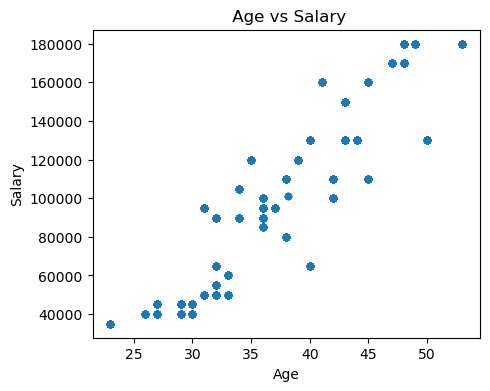

In [10]:
data_set1.plot(kind = 'scatter', x = 'Age', y = 'Salary' , figsize=(5, 4)) 
plt.title(' Age vs Salary')

Text(0.5, 1.0, ' Years of Experience vs Salary')

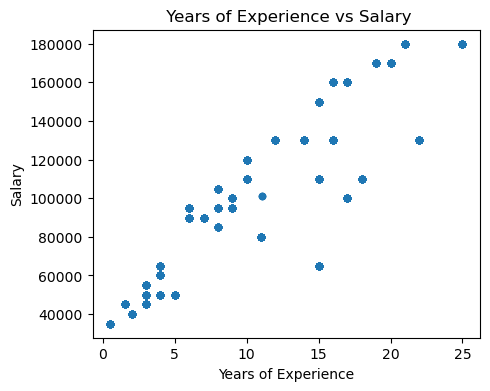

In [11]:
data_set1.plot(kind='scatter', x='Years of Experience', y='Salary', figsize=(5, 4)) 
plt.title(' Years of Experience vs Salary')

In [12]:
data_set1['Education Level'].value_counts()

Bachelor's    1292
Master's       582
PhD            177
Name: Education Level, dtype: int64

In [13]:
data_set1['Gender'].value_counts()

Male      1078
Female     973
Name: Gender, dtype: int64

In [14]:
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,Male,Bachelor's,Senior IT Project Manager,14.0,130000.0
1,42.0,Female,Master's,Senior Graphic Designer,15.0,110000.0
2,37.0,Male,Bachelor's,Software Project Manager,9.0,95000.0
3,50.0,Female,Bachelor's,Supply Chain Analyst,22.0,130000.0
4,32.0,Male,Master's,Senior Business Analyst,6.0,90000.0


In [15]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder=LabelEncoder()

data_set1["Gender"]=Label_Encoder.fit_transform(data_set1["Gender"])
data_set1["Education Level"]=Label_Encoder.fit_transform(data_set1["Education Level"])
data_set1["Job Title"]=Label_Encoder.fit_transform(data_set1["Job Title"])
data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,43.0,1,0,27,14.0,130000.0
1,42.0,0,1,25,15.0,110000.0
2,37.0,1,0,37,9.0,95000.0
3,50.0,0,0,38,22.0,130000.0
4,32.0,1,1,22,6.0,90000.0


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_set1["Age"]=scaler.fit_transform(data_set1[["Age"]])
data_set1["Years of Experience"]=scaler.fit_transform(data_set1[["Years of Experience"]])
data_set1["Job Title"]=scaler.fit_transform(data_set1[["Job Title"]])

data_set1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,0.653901,1,0,0.649632,0.422741,130000.0
1,0.519960,0,1,0.475413,0.566362,110000.0
2,-0.149745,1,0,1.520728,-0.295365,95000.0
3,1.591489,0,0,1.607837,1.571711,130000.0
4,-0.819450,1,1,0.214084,-0.726229,90000.0


In [17]:
X=data_set1[["Age","Gender","Education Level","Job Title","Years of Experience"]]
y=data_set1[["Salary"]]

In [18]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score ,r2_score

kf = KFold(n_splits=4, shuffle=True, random_state=42)
r2_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    
    y_pred = linear_model.predict(X_test)
    
    
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)



In [19]:
from sklearn.metrics import accuracy_score ,r2_score
avg_r2_score = np.mean(r2_scores)
print("Average R2 Score is {0:.2f}% :". format( 100*avg_r2_score))

Average R2 Score is 90.73% :


Text(0.5, 1.0, 'Predicted vs Actual Salary (Linear Regression)')

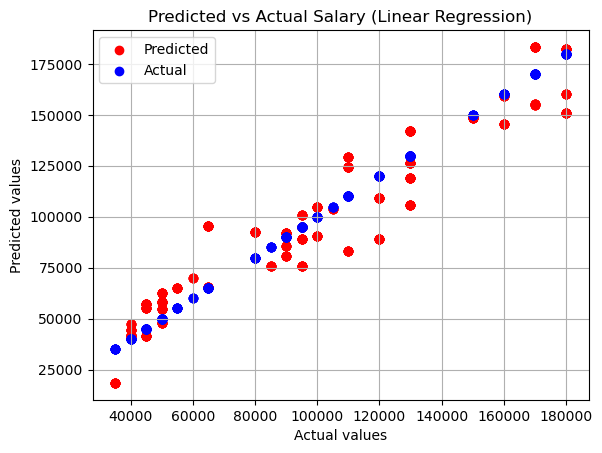

In [20]:
plt.scatter(y_test, y_pred, c='red', label='Predicted')
plt.scatter(y_test, y_test, c='blue', label='Actual')

plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.grid(True)
plt.legend()
plt.title('Predicted vs Actual Salary (Linear Regression)')



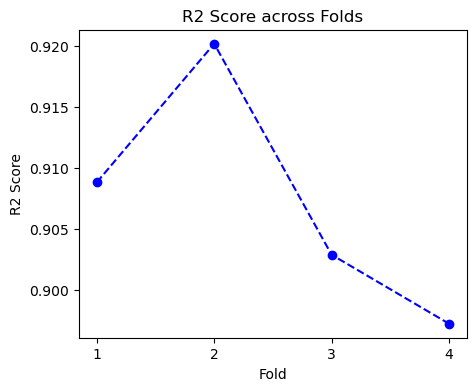

In [21]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 5), r2_scores, marker='o', linestyle='dashed', color='blue')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('R2 Score across Folds')
plt.xticks(np.arange(1, 5))
plt.show()